In [16]:
# load the libraries

import sys
sys.path.append('/home/KutumLabGPU/Documents/santosh/TNBC-project/models/hovernet/hover_net/')

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2
import json

In [17]:
# first, we shall set the image tile, WSI and output paths.

tile_path = '/home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/'
tile_json_path = '/home/KutumLabGPU/Documents/santosh/TNBC-project/prediction-results/hovernet/json/'
tile_mat_path = '/home/KutumLabGPU/Documents/santosh/TNBC-project/prediction-results/hovernet/mat/'
tile_overlay_path = '/home/KutumLabGPU/Documents/santosh/TNBC-project/prediction-results/hovernet/overlay/'

In [18]:
print('Tile path: ', tile_path)

Tile path:  /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/


In [19]:
image_list = glob.glob(os.path.join(tile_path, '*.png'))
print("Found", len(image_list), "images")

# Print the list of files with their indices
for index, file in enumerate(image_list):
    print(f"{index}: {file}")

Found 10 images
0: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_03.png
1: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_04.png
2: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_01.png
3: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_08.png
4: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_09.png
5: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_06.png
6: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_10.png
7: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_07.png
8: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_05.png
9: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_02.png


In [20]:
rand_nr = 2 # This is the first image
if image_list:
    image_file = image_list[rand_nr]
    print("Loading:", image_file)
else:
    print("No images found. Check the directory and file extension.")

Loading: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_01.png


In [21]:
# load the original image, the `.mat` file and the overlay

image_file = image_list[rand_nr]
print("Loading image file:", image_file)

basename = os.path.basename(image_file)
image_ext = basename.split('.')[-1]
basename = basename[:-(len(image_ext)+1)]

image = cv2.imread(image_file)
# convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# get the corresponding `.mat` file 
result_mat = sio.loadmat(os.path.join(tile_mat_path, basename + '.mat'))
print("Loaded .mat file:", os.path.join(tile_mat_path, basename + '.mat'))

# get the overlay
overlay = cv2.imread(tile_overlay_path + basename + '.png')
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

Loading image file: /home/KutumLabGPU/Documents/santosh/TNBC-project/input-dir/pannuke/patches/image_01.png
Loaded .mat file: /home/KutumLabGPU/Documents/santosh/TNBC-project/prediction-results/hovernet/mat/image_01.mat


In [22]:
# print the keys of the result_mat
print("Keys in the result_mat:", result_mat.keys())

Keys in the result_mat: dict_keys(['__header__', '__version__', '__globals__', 'inst_map', 'inst_uid', 'inst_type', 'inst_centroid', 'raw_map'])


In [23]:
inst_map = result_mat['inst_map'] 
inst_type = result_mat['inst_type'].squeeze()  # 1D array
inst_uid = result_mat['inst_uid'].squeeze()    # 1D array

print('instance map shape', inst_map.shape)
print('number of instances', len(np.unique(inst_map)[1:].tolist()))
print('number of type predictions', len(np.unique(inst_type)))  # FIXED LINE
print('overlay shape', overlay.shape)


instance map shape (1024, 1024)
number of instances 5
number of type predictions 4
overlay shape (1024, 1024, 3)


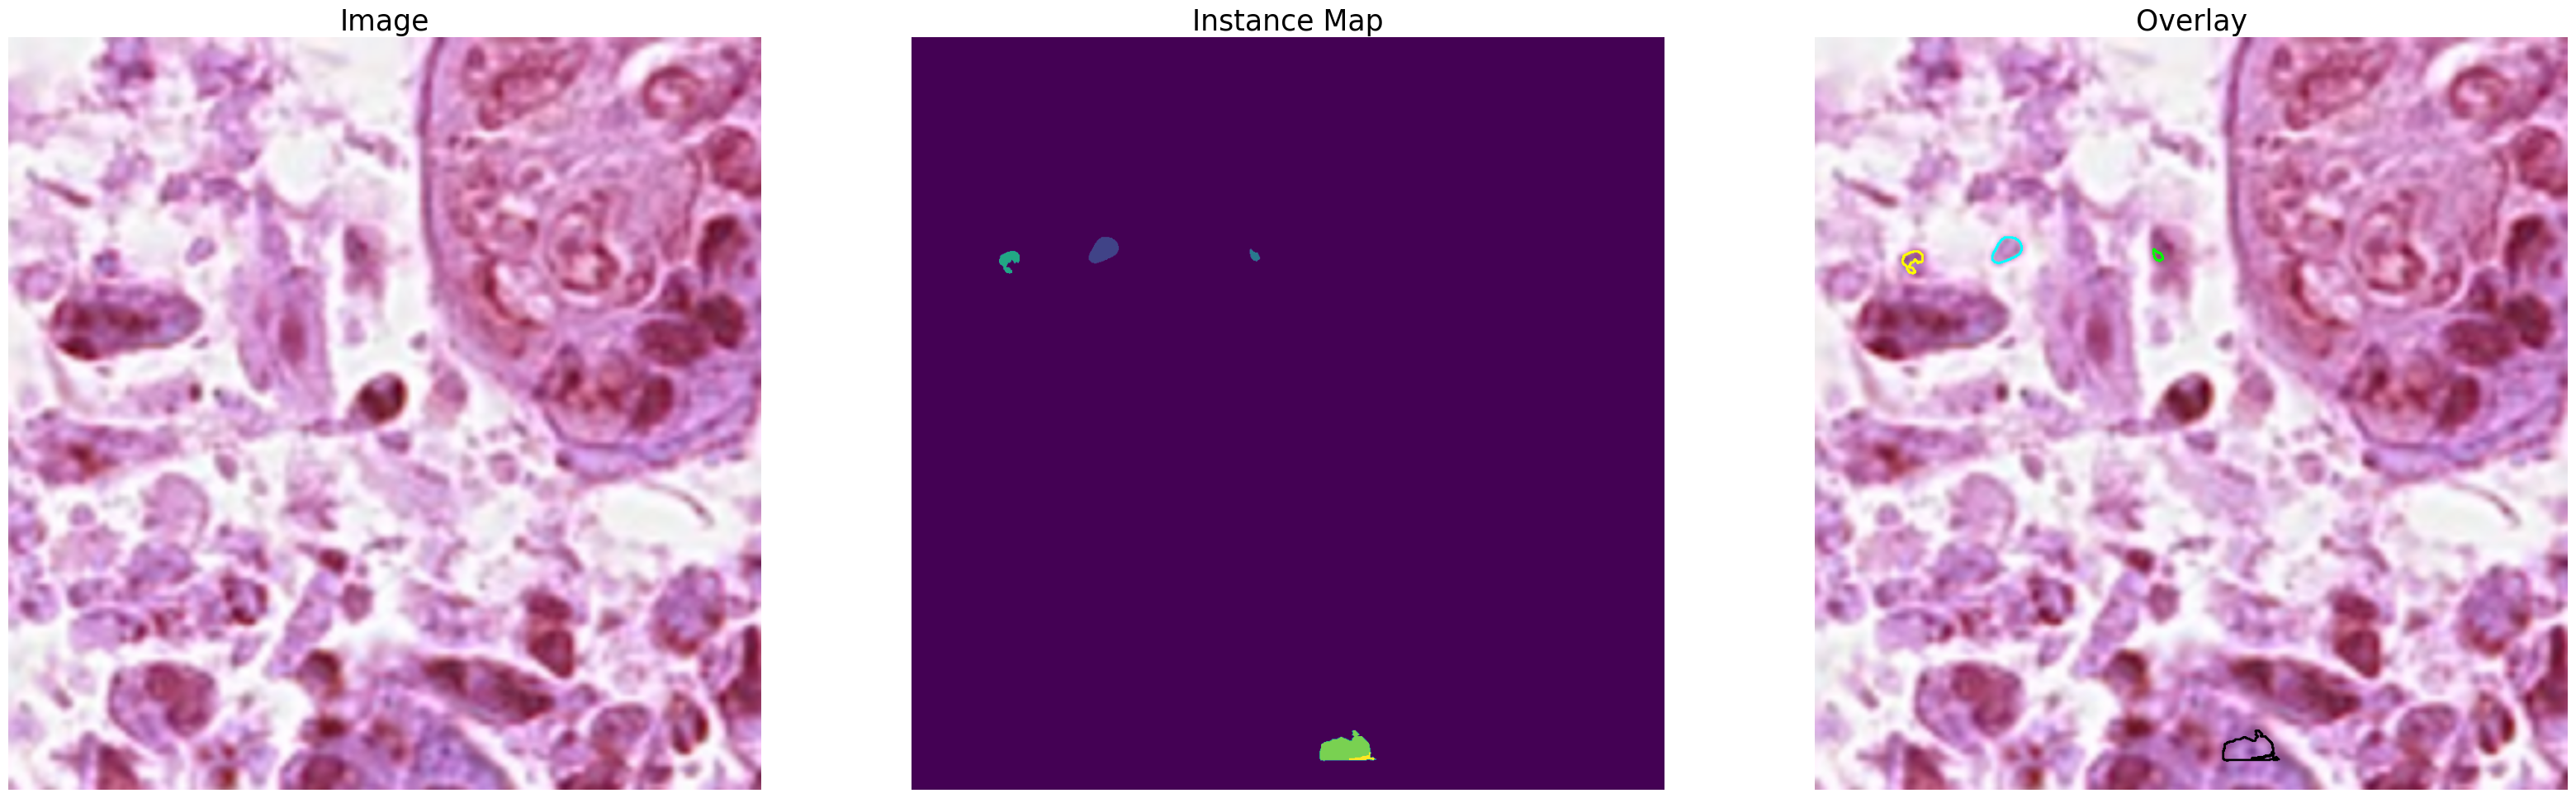

In [24]:
# plot the original image, along with the instance map and the overlay

plt.figure(figsize=(40,20))

plt.subplot(1,3,1)
plt.imshow(image)
plt.axis('off')
plt.title('Image', fontsize=25)

plt.subplot(1,3,2)
plt.imshow(inst_map)
plt.axis('off')
plt.title('Instance Map', fontsize=25)

plt.subplot(1,3,3)
plt.imshow(overlay)
plt.axis('off')
plt
plt.title('Overlay', fontsize=25)

plt.show()

In [25]:
# let's inspect the inst_type output

print(np.unique(inst_type))

[1 3 4 5]


In [26]:
# load the json file and add the contents to corresponding lists

json_path = os.path.join(tile_json_path + basename + '.json')

bbox_list = []
centroid_list = []
contour_list = [] 
type_list = []

with open(json_path) as json_file:
    data = json.load(json_file)
    mag_info = data['mag']
    nuc_info = data['nuc']
    for inst in nuc_info:
        inst_info = nuc_info[inst]
        inst_centroid = inst_info['centroid']
        centroid_list.append(inst_centroid)
        inst_contour = inst_info['contour']
        contour_list.append(inst_contour)
        inst_bbox = inst_info['bbox']
        bbox_list.append(inst_bbox)
        inst_type = inst_info['type']
        type_list.append(inst_type)

In [27]:
# get the number of items in each list

print('Number of centroids', len(centroid_list))
print('Number of contours', len(contour_list))
print('Number of bounding boxes', len(bbox_list))

# each item is a list of coordinates - let's take a look!
print('-'*60)
print(centroid_list[0])
print('-'*60)
print(contour_list[0])
print('-'*60)
print(bbox_list[0])

Number of centroids 5
Number of contours 5
Number of bounding boxes 5
------------------------------------------------------------
[260.9102564102564, 289.15976331360946]
------------------------------------------------------------
[[258, 272], [256, 274], [255, 274], [252, 277], [252, 278], [249, 281], [249, 282], [248, 283], [248, 284], [247, 285], [247, 286], [246, 287], [246, 288], [245, 289], [245, 290], [243, 292], [243, 293], [242, 294], [242, 296], [241, 297], [241, 302], [245, 306], [247, 306], [248, 307], [251, 307], [252, 306], [254, 306], [255, 305], [257, 305], [258, 304], [260, 304], [261, 303], [262, 303], [263, 302], [265, 302], [267, 300], [269, 300], [270, 299], [271, 299], [272, 298], [273, 298], [275, 296], [276, 296], [279, 293], [279, 292], [280, 291], [280, 290], [281, 289], [281, 284], [280, 283], [280, 281], [279, 280], [279, 279], [275, 275], [274, 275], [272, 273], [269, 273], [268, 272]]
------------------------------------------------------------
[[272, 241

In [28]:
# get a single contour, bounding box and centroid and visualise

rand_nucleus = np.random.randint(0, len(centroid_list))
rand_centroid = centroid_list[rand_nucleus]
rand_bbox = bbox_list[rand_nucleus]
rand_contour = contour_list[rand_nucleus]

# draw the overlays
overlay = image.copy()
overlay = cv2.drawContours(overlay.astype('uint8'), [np.array(rand_contour)], -1, (255,255,0), 1)
overlay = cv2.circle(overlay.astype('uint8'),(np.round(rand_centroid[0]).astype('int'), np.round(rand_centroid[1]).astype('int')), 3, (0,255,0), -1)
overlay = cv2.rectangle(overlay.astype('uint8'), (rand_bbox[0][1], rand_bbox[0][0]), (rand_bbox[1][1], rand_bbox[1][0]), (255,0,0), 1)

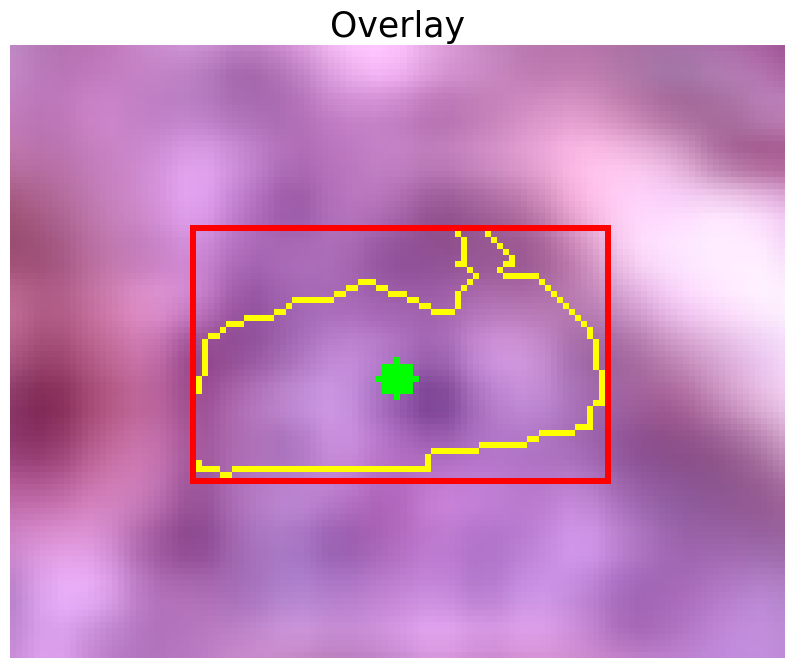

In [29]:
# plot the cropped overlay

pad = 30
crop1 = rand_bbox[0][0]-pad
if crop1 < 0: 
    crop1 = 0
crop2 = rand_bbox[1][0]+pad
if crop2 > overlay.shape[0]: 
    crop2 = overlay.shape[0]
crop3 = rand_bbox[0][1]-pad
if crop3 < 0: 
    crop3 = 0
crop4 = rand_bbox[1][1]+pad
if crop4 > overlay.shape[1]: 
    crop4 = overlay.shape[1]
crop_overlay = overlay[crop1:crop2,crop3:crop4,:]
plt.figure(figsize=(10,10))

plt.imshow(crop_overlay)
plt.axis('off')
plt.title('Overlay', fontsize=25)
plt.show()

In [30]:
for i, bbox in enumerate(bbox_list):
    width = bbox[1][0] - bbox[0][0]
    height = bbox[1][1] - bbox[0][1]
    print(f'Nucleus {i+1}: Width={width}, Height={height}')


Nucleus 1: Width=36, Height=41
Nucleus 2: Width=17, Height=14
Nucleus 3: Width=31, Height=28
Nucleus 4: Width=42, Height=69
Nucleus 5: Width=11, Height=37
